# ResNet18 on CIFAR10
---

1) Extracted Resnet18 model and added it to [my API](https://github.com/genigarus/EVA4/tree/master/API/models)

2) Used my data loader, model loading, train, and test code to train ResNet18 on Cifar10

3) Best Test Accuracy = 90.77%, Final Test accuracy = 89.77%, number of epochs = 50, Total Params = 11,173,962. 

4) Used image augmentation

[Link to Google Colab Code File](https://colab.research.google.com/drive/1hcK2vTKwCoXGjdiG9DS3_sHaSH8DC-Da)

[Link to python helper files](https://github.com/genigarus/EVA4/tree/master/API)

## Google Drive Connection

In [0]:
## Connecting google drive to colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145118 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### Change working directory to where python files are located

In [0]:
import os
default_path = 'drive/EVA4/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/EVA4/API


# Imports

In [0]:
from __future__ import print_function
import math
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

%matplotlib inline
import matplotlib.pyplot as plt

!pip install torchsummary
from torchsummary import summary

# Model

In [0]:
from models import *

# Training Code


In [0]:
from training_testing import train

# Testing Code

In [0]:
from training_testing import test

# Regularization

In [0]:
from regularization import *

# Dataloader/Transformations/Image-augmentations


In [0]:
from data_loader import generate_train_test_loader


# Misc Items like finding misclassified images

In [0]:
from utility import *

# Execution(Run models for 50 epochs)

In [0]:
# google drive path for saving models, graphs and images
PATH = "../Session8"

## Generating Data Loaders

In [0]:
SEED = 1
means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
DATA_PATH = PATH+'/data'

train_loader, test_loader, test_data = generate_train_test_loader(DATA_PATH, SEED, means, stdevs)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/391 [00:00<?, ?it/s]

**************************************************
********** With Resnet18 model **********
**************************************************

 Initializing...
Creating model...

 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1

Loss=2.0311341285705566 Batch_id=390 Accuracy=49.03: 100%|██████████| 391/391 [01:06<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 5503/10000 (55.03%)

EPOCH: 2


Loss=1.6827178001403809 Batch_id=390 Accuracy=67.87: 100%|██████████| 391/391 [01:05<00:00,  6.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 6498/10000 (64.98%)

EPOCH: 3


Loss=1.4944424629211426 Batch_id=390 Accuracy=75.69: 100%|██████████| 391/391 [01:05<00:00,  6.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7705/10000 (77.05%)

EPOCH: 4


Loss=1.4165538549423218 Batch_id=390 Accuracy=79.34: 100%|██████████| 391/391 [01:05<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 7475/10000 (74.75%)

EPOCH: 5


Loss=1.4972513914108276 Batch_id=390 Accuracy=81.69: 100%|██████████| 391/391 [01:05<00:00,  6.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7822/10000 (78.22%)

EPOCH: 6


Loss=1.2146306037902832 Batch_id=390 Accuracy=83.43: 100%|██████████| 391/391 [01:05<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8176/10000 (81.76%)

EPOCH: 7


Loss=1.0538486242294312 Batch_id=390 Accuracy=84.89: 100%|██████████| 391/391 [01:05<00:00,  6.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8267/10000 (82.67%)

EPOCH: 8


Loss=1.0309051275253296 Batch_id=390 Accuracy=86.16: 100%|██████████| 391/391 [01:05<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8115/10000 (81.15%)

EPOCH: 9


Loss=0.9846339821815491 Batch_id=390 Accuracy=87.13: 100%|██████████| 391/391 [01:05<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8329/10000 (83.29%)

EPOCH: 10


Loss=0.9517426490783691 Batch_id=390 Accuracy=87.79: 100%|██████████| 391/391 [01:05<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8325/10000 (83.25%)

EPOCH: 11


Loss=1.0375127792358398 Batch_id=390 Accuracy=88.53: 100%|██████████| 391/391 [01:05<00:00,  6.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8587/10000 (85.87%)

EPOCH: 12


Loss=0.9257340431213379 Batch_id=390 Accuracy=89.32: 100%|██████████| 391/391 [01:05<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8620/10000 (86.20%)

EPOCH: 13


Loss=0.9898914694786072 Batch_id=390 Accuracy=89.44: 100%|██████████| 391/391 [01:05<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8551/10000 (85.51%)

EPOCH: 14


Loss=0.9156540036201477 Batch_id=390 Accuracy=90.08: 100%|██████████| 391/391 [01:05<00:00,  6.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8571/10000 (85.71%)

EPOCH: 15


Loss=0.7538177967071533 Batch_id=390 Accuracy=90.32: 100%|██████████| 391/391 [01:05<00:00,  6.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8651/10000 (86.51%)

EPOCH: 16


Loss=0.6481790542602539 Batch_id=390 Accuracy=90.77: 100%|██████████| 391/391 [01:05<00:00,  6.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8508/10000 (85.08%)

EPOCH: 17


Loss=0.6103735566139221 Batch_id=390 Accuracy=91.09: 100%|██████████| 391/391 [01:05<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8563/10000 (85.63%)

EPOCH: 18


Loss=0.7982615232467651 Batch_id=390 Accuracy=91.52: 100%|██████████| 391/391 [01:05<00:00,  6.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8653/10000 (86.53%)

EPOCH: 19


Loss=0.5714067220687866 Batch_id=390 Accuracy=91.71: 100%|██████████| 391/391 [01:05<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8571/10000 (85.71%)

EPOCH: 20


Loss=0.666029691696167 Batch_id=390 Accuracy=91.76: 100%|██████████| 391/391 [01:05<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8361/10000 (83.61%)

EPOCH: 21


Loss=0.7073297500610352 Batch_id=390 Accuracy=92.15: 100%|██████████| 391/391 [01:05<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8786/10000 (87.86%)

EPOCH: 22


Loss=0.6236323118209839 Batch_id=390 Accuracy=92.29: 100%|██████████| 391/391 [01:05<00:00,  6.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8656/10000 (86.56%)

EPOCH: 23


Loss=0.5996423363685608 Batch_id=390 Accuracy=92.49: 100%|██████████| 391/391 [01:05<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8789/10000 (87.89%)

EPOCH: 24


Loss=0.4903583824634552 Batch_id=390 Accuracy=92.73: 100%|██████████| 391/391 [01:05<00:00,  6.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8861/10000 (88.61%)

EPOCH: 25


Loss=0.5218098163604736 Batch_id=390 Accuracy=92.72: 100%|██████████| 391/391 [01:05<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8767/10000 (87.67%)

EPOCH: 26


Loss=0.6535432934761047 Batch_id=390 Accuracy=93.07: 100%|██████████| 391/391 [01:05<00:00,  6.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8633/10000 (86.33%)

EPOCH: 27


Loss=0.6297220587730408 Batch_id=390 Accuracy=92.93: 100%|██████████| 391/391 [01:05<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8791/10000 (87.91%)

EPOCH: 28


Loss=0.6100600361824036 Batch_id=390 Accuracy=93.19: 100%|██████████| 391/391 [01:05<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8746/10000 (87.46%)

EPOCH: 29


Loss=0.5507486462593079 Batch_id=390 Accuracy=93.34: 100%|██████████| 391/391 [01:05<00:00,  6.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8516/10000 (85.16%)

EPOCH: 30


Loss=0.4978582262992859 Batch_id=390 Accuracy=93.47: 100%|██████████| 391/391 [01:05<00:00,  6.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8844/10000 (88.44%)

EPOCH: 31


Loss=0.547679603099823 Batch_id=390 Accuracy=93.93: 100%|██████████| 391/391 [01:05<00:00,  6.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8815/10000 (88.15%)

EPOCH: 32


Loss=0.5574731230735779 Batch_id=390 Accuracy=93.91: 100%|██████████| 391/391 [01:05<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8702/10000 (87.02%)

EPOCH: 33


Loss=0.5311502814292908 Batch_id=390 Accuracy=93.91: 100%|██████████| 391/391 [01:05<00:00,  6.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8779/10000 (87.79%)

EPOCH: 34


Loss=0.46517810225486755 Batch_id=390 Accuracy=93.79: 100%|██████████| 391/391 [01:05<00:00,  6.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8379/10000 (83.79%)

EPOCH: 35


Loss=0.4796636700630188 Batch_id=390 Accuracy=94.00: 100%|██████████| 391/391 [01:05<00:00,  6.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8691/10000 (86.91%)

EPOCH: 36


Loss=0.3671419322490692 Batch_id=390 Accuracy=94.33: 100%|██████████| 391/391 [01:05<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8977/10000 (89.77%)

EPOCH: 37


Loss=0.5591409802436829 Batch_id=390 Accuracy=94.35: 100%|██████████| 391/391 [01:05<00:00,  6.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8774/10000 (87.74%)

EPOCH: 38


Loss=0.4410584568977356 Batch_id=390 Accuracy=94.30: 100%|██████████| 391/391 [01:05<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8776/10000 (87.76%)

EPOCH: 39


Loss=0.4139367341995239 Batch_id=390 Accuracy=94.47: 100%|██████████| 391/391 [01:05<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8881/10000 (88.81%)

EPOCH: 40


Loss=0.4648827910423279 Batch_id=390 Accuracy=94.80: 100%|██████████| 391/391 [01:05<00:00,  6.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8964/10000 (89.64%)

EPOCH: 41


Loss=0.3994772434234619 Batch_id=390 Accuracy=94.59: 100%|██████████| 391/391 [01:05<00:00,  6.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8929/10000 (89.29%)

EPOCH: 42


Loss=0.40095967054367065 Batch_id=390 Accuracy=94.97: 100%|██████████| 391/391 [01:05<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8983/10000 (89.83%)

EPOCH: 43


Loss=0.4470791220664978 Batch_id=390 Accuracy=94.78: 100%|██████████| 391/391 [01:05<00:00,  6.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9018/10000 (90.18%)

EPOCH: 44


Loss=0.4821648597717285 Batch_id=390 Accuracy=95.19: 100%|██████████| 391/391 [01:05<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8839/10000 (88.39%)

EPOCH: 45


Loss=0.4635390639305115 Batch_id=390 Accuracy=94.95: 100%|██████████| 391/391 [01:05<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9077/10000 (90.77%)

EPOCH: 46


Loss=0.43542173504829407 Batch_id=390 Accuracy=95.14: 100%|██████████| 391/391 [01:05<00:00,  6.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8885/10000 (88.85%)

EPOCH: 47


Loss=0.48876023292541504 Batch_id=390 Accuracy=95.17: 100%|██████████| 391/391 [01:05<00:00,  6.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8936/10000 (89.36%)

EPOCH: 48


Loss=0.49678105115890503 Batch_id=390 Accuracy=95.21: 100%|██████████| 391/391 [01:05<00:00,  6.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8957/10000 (89.57%)

EPOCH: 49


Loss=0.4407842755317688 Batch_id=390 Accuracy=95.28: 100%|██████████| 391/391 [01:05<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8995/10000 (89.95%)

EPOCH: 50


Loss=0.3515792191028595 Batch_id=390 Accuracy=95.50: 100%|██████████| 391/391 [01:05<00:00,  6.70it/s]



Test set: Average loss: 0.0028, Accuracy: 8977/10000 (89.77%)


 Saving trained model...

 Visualizing:


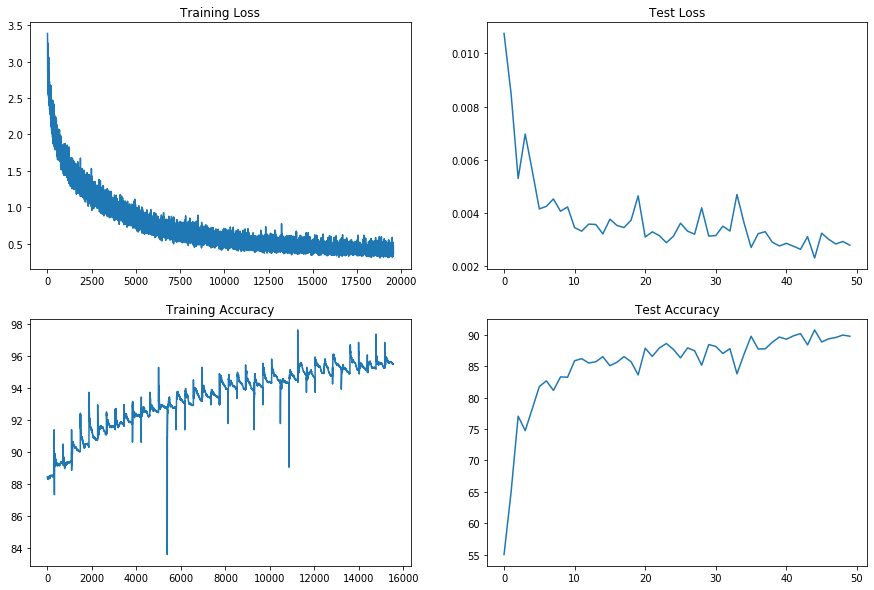

In [0]:
print("*"*50)
print("*"*10,"With Resnet18 model","*"*10)
print("*"*50)
print("\n Initializing...")
aug_l1_l2_reg_train_losses = []
aug_l1_l2_reg_test_losses = []
aug_l1_l2_reg_train_acc = []
aug_l1_l2_reg_test_acc = []
# dropout_value = 0.2
LAMBDA1=1e-5
LR=0.01
MOMENTUM=0.9
WEIGHT_DECAY=5e-4
inp_size = (3, 32, 32)
device = set_device()

print("Creating model...")
aug_l1_l2_model =  ResNet18().to(device)

print("\n Model Summary:")
summary(aug_l1_l2_model, input_size=inp_size)
optimizer = optim.SGD(aug_l1_l2_model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
criterion = nn.CrossEntropyLoss()

print("\n Training the model...")
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(aug_l1_l2_model, device, train_loader, optimizer, criterion, epoch, aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, l1=True, lambda1=LAMBDA1)
    test(aug_l1_l2_model, device, criterion, test_loader, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)

print("\n Saving trained model...")
torch.save(aug_l1_l2_model.state_dict(), PATH+"/model/cifar10_aug_model_l1_l2.pth")

print("\n Visualizing:")
visualize_graph(aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)

# Observations
---

1) Without any regularization and image augmentation, Resnet18 was barely able to consistently maintain 85% under 50 epochs. The model was overfitted.

![alt text](https://raw.githubusercontent.com/genigarus/EVA4/master/S8/Assets/no_reg_resnet18_loss.PNG)


2) Using L2 regularization and image augmentation, overfitting was reduced by 3%. Also, the loss graph became smoother and the model was able to consistenly maintain 90%.

![alt text](https://raw.githubusercontent.com/genigarus/EVA4/master/S8/Assets/l2_reg_resnet18_loss.PNG)

3) Extending this further, I tried using both L1 and L2 for regularization along with image augmentation. This further reduced overfitting by 1.5%.

![alt text](https://raw.githubusercontent.com/genigarus/EVA4/master/S8/Assets/l1_l2_reg_resnet18_loss.PNG)
